In [1]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# 데이터 로드
df = pd.read_csv("./abalone.data", header=None)
df.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
# 결측치 확인
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [4]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [5]:
#레이블 개수 확인 (Sex, 숫자)
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

Text(0.5, 1.0, 'Rings')

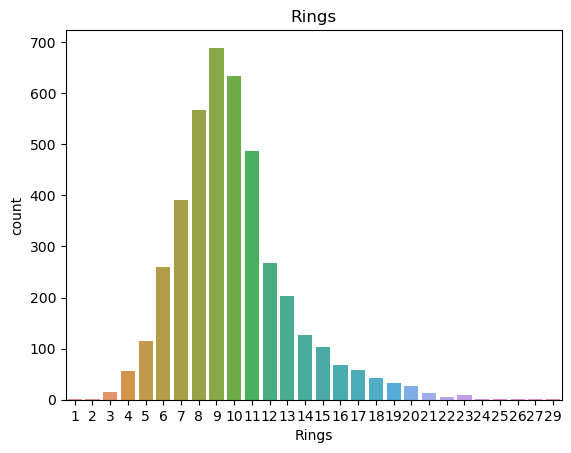

In [6]:
# 레이블 갯수 확인 (Rings, 그래프)
sns.countplot(data = df, x="Rings")
plt.xlabel("Rings")
plt.ylabel("count")
plt.title("Rings")

In [7]:
#숫자가 아닌 레이블을 숫자로 
label = LabelEncoder()
df['Sex'] = label.fit_transform(df['Sex'])

df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [8]:
X = df.drop(['Sex'], axis=1)  
y = df['Sex']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
# random_state는 데이터를 무작위로 나누거나 섞을 때 사용되는 난수 발생기의 시드(seed) 값

scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

X_train

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.417528,0.516317,1.047137,0.540131,0.402847,0.326182,0.762996,1.579422
1,-0.212587,-0.040764,-0.006955,-0.324465,-0.431539,-0.526972,0.076241,2.522020
2,-0.884709,-1.053638,-0.943926,-1.007096,-0.888519,-0.953549,-1.109314,-0.934171
3,1.929804,1.681121,1.398501,2.553068,2.971937,2.605846,1.738911,0.322626
4,0.879613,0.870822,0.578651,0.979112,1.087180,0.940819,0.546126,0.322626
...,...,...,...,...,...,...,...,...
3127,-0.800694,-0.800419,-1.061048,-1.051302,-1.099957,-1.068220,-0.841841,-0.934171
3128,0.669574,0.870822,0.695773,0.837240,0.764338,0.596806,1.088301,1.265223
3129,1.173666,1.174685,0.930015,1.228930,1.416842,0.995862,1.160591,0.636825
3130,0.963628,1.579834,2.101229,1.418092,1.291797,1.748105,1.203965,1.579422


In [9]:
y_train

253     0
3274    0
4107    1
3082    0
1017    0
       ..
3749    1
414     0
1968    2
1394    2
880     2
Name: Sex, Length: 3132, dtype: int32

In [10]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print('{:.5f}'.format(accuracy_score(y_test, pred_svm)))
print(confusion_matrix(y_test, pred_svm))
print(classification_report(y_test,pred_svm))


--- SVM Classifier ---
0.53493
[[ 75  48 200]
 [  6 279  54]
 [ 79  99 205]]
              precision    recall  f1-score   support

           0       0.47      0.23      0.31       323
           1       0.65      0.82      0.73       339
           2       0.45      0.54      0.49       383

    accuracy                           0.53      1045
   macro avg       0.52      0.53      0.51      1045
weighted avg       0.52      0.53      0.51      1045



In [11]:
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print ('{:.5f}'.format(accuracy_score(y_test, pred_dt)))
print (confusion_matrix(y_test, pred_dt))
print(classification_report(y_test,pred_dt))


--- Decision Tree Classifier ---
0.49378
[[136  51 136]
 [ 58 229  52]
 [147  85 151]]
              precision    recall  f1-score   support

           0       0.40      0.42      0.41       323
           1       0.63      0.68      0.65       339
           2       0.45      0.39      0.42       383

    accuracy                           0.49      1045
   macro avg       0.49      0.50      0.49      1045
weighted avg       0.49      0.49      0.49      1045



In [12]:
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train, y_train)

pred_nn = clf_nn.predict(X_test)

print ("\n--- Neural Network Classifier ---")
print ('{:.5f}'.format(accuracy_score(y_test, pred_nn)))
print (confusion_matrix(y_test, pred_nn))
print(classification_report(y_test,pred_nn))


--- Neural Network Classifier ---
0.56842
[[127  40 156]
 [ 21 283  35]
 [122  77 184]]
              precision    recall  f1-score   support

           0       0.47      0.39      0.43       323
           1       0.71      0.83      0.77       339
           2       0.49      0.48      0.49       383

    accuracy                           0.57      1045
   macro avg       0.56      0.57      0.56      1045
weighted avg       0.55      0.57      0.56      1045



C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [13]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [14]:
X=df.drop('Rings', axis=1)
y=df['Rings']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

X_train

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
360,2,0.605,0.490,0.180,1.2270,0.4800,0.2870,0.3500
3345,0,0.480,0.380,0.145,0.5900,0.2320,0.1410,0.2300
480,0,0.700,0.585,0.185,1.8075,0.7055,0.3215,0.4750
71,0,0.400,0.320,0.110,0.3530,0.1405,0.0985,0.1000
2551,1,0.295,0.220,0.070,0.1260,0.0515,0.0275,0.0350
...,...,...,...,...,...,...,...,...
2935,2,0.620,0.475,0.195,1.3585,0.5935,0.3365,0.3745
2633,1,0.425,0.330,0.115,0.3265,0.1315,0.0770,0.1030
3735,2,0.615,0.475,0.150,1.0375,0.4760,0.2325,0.2830
3442,2,0.480,0.370,0.130,0.6430,0.3490,0.1155,0.1350


In [15]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

In [16]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print('모델점수', model.score(X_test, y_test))

from sklearn.metrics import mean_squared_error

ly_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(ly_preds, y_test))
print('평균제곱근오차', mse)

모델점수 0.533225311148732
평균제곱근오차 2.247168221082753


In [17]:
#여기부터 DL 
X=df.drop('Sex', axis=1)
y=df['Sex']
y = pd.get_dummies(y).values
y

array([[0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       ...,
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1]], dtype=uint8)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train.shape[1]

8

In [19]:
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras.optimizers import Adam

# Define the input layer
inputs = Input(shape=(X_train.shape[1],))

# Define the model architecture
x = Dense(12, activation='relu')(inputs)
x = Dense(15, activation='relu')(x)
x = Dense(6, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

# Create the model
model = Model(inputs=inputs, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.02), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 15)                195       
                                                                 
 dense_2 (Dense)             (None, 6)                 96        
                                                                 
 dense_3 (Dense)             (None, 3)                 21        
                                                                 
Total params: 420 (1.64 KB)
Trainable params: 420 (1.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
model_history=model.fit(x=X_train, y=y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/50
98/98 [==============================] - 1s 3ms/step - loss: 1.0080 - accuracy: 0.4527 - val_loss: 0.9003 - val_accuracy: 0.5081
Epoch 2/50
98/98 [==============================] - 0s 1ms/step - loss: 0.8933 - accuracy: 0.5140 - val_loss: 0.8795 - val_accuracy: 0.5397
Epoch 3/50
98/98 [==============================] - 0s 1ms/step - loss: 0.8884 - accuracy: 0.5204 - val_loss: 0.8922 - val_accuracy: 0.5416
Epoch 4/50
98/98 [==============================] - 0s 1ms/step - loss: 0.8900 - accuracy: 0.5217 - val_loss: 0.8764 - val_accuracy: 0.5407
Epoch 5/50
98/98 [==============================] - 0s 1ms/step - loss: 0.8795 - accuracy: 0.5255 - val_loss: 0.8717 - val_accuracy: 0.5455
Epoch 6/50
98/98 [==============================] - 0s 1ms/step - loss: 0.8822 - accuracy: 0.5259 - val_loss: 0.8698 - val_accuracy: 0.5435
Epoch 7/50
98/98 [==============================] - 0s 1ms/step - loss: 0.8795 - accuracy: 0.5227 - val_loss: 0.8781 - val_accuracy: 0.5416
Epoch 8/50
98/98 [==

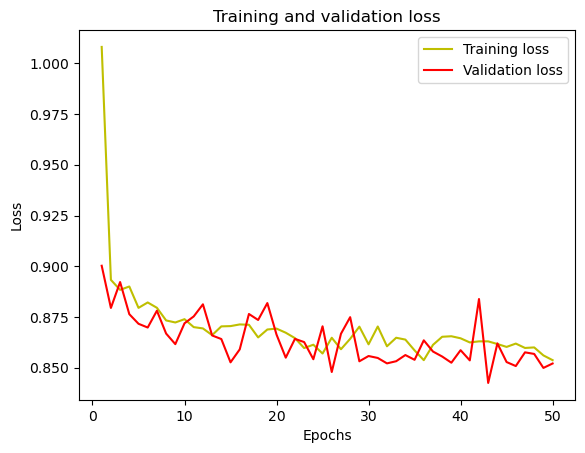

In [21]:
# 훈련 손실(training loss)과 검증 손실(validation loss) 추출
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

# 에포크(epoch) 범위 생성
epochs = range(1, len(loss) + 1)

# 훈련 손실(training loss)과 검증 손실(validation loss) 시각화
plt.plot(epochs, loss, 'y', label='Training loss')  # 훈련 손실을 노란색(yellow)으로 플롯
plt.plot(epochs, val_loss, 'r', label='Validation loss')  # 검증 손실을 빨간색(red)으로 플롯
plt.title('Training and validation loss')  # 그래프 제목 설정
plt.xlabel('Epochs')  # x축 레이블 설정
plt.ylabel('Loss')  # y축 레이블 설정
plt.legend()  # 범례(legend) 표시
plt.show()  # 그래프 출력

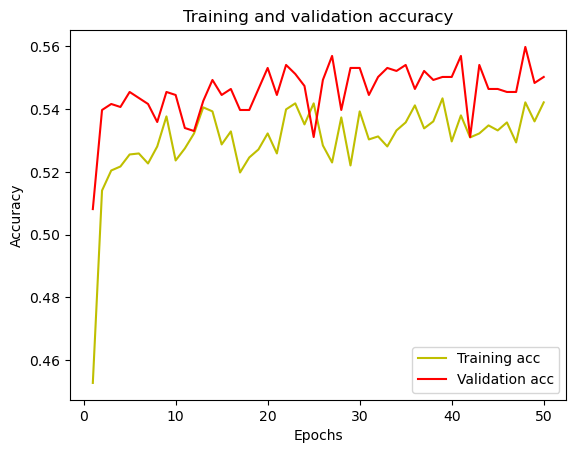

In [22]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [23]:
#Accuracy of the predicted values
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.46      0.72      0.56       316
           1       0.72      0.78      0.75       359
           2       0.42      0.19      0.26       370

    accuracy                           0.55      1045
   macro avg       0.53      0.56      0.52      1045
weighted avg       0.53      0.55      0.52      1045

[[226  39  51]
 [ 34 280  45]
 [229  72  69]]
